# Introducción a Python para ciencias e ingenierías (clase 7)


Ing. Martín Gaitán

- Twitter: `@tin_nqn_`
- Email: gaitan@gmail.com

Con la participación especial de Damián Ávila  

- Twitter: `@damian_avila`
- Email: damianavila@gmail.com


**Anotate en las listas de correo**

- python.org.ar  (Python General -- Tod@s!)
- scipyla.org   (Python Científico - en portuñol/ingles)

# Profundizando en IPython / Jupyter

## Modos 

IPython Notebook tiene una intefaz de edición modal. Significa que los comandos de teclados hacen distintas cosas en función de en qué modo se encuentre de los dos disponibles: modo edición o modo comandos. 

Editores como `vim` también tienen este comportamiento. 

<div class="alert alert-success">
El modo edición se activa presionando `Enter` o haciendo click sobre una celda
</div>

En este modo, el borde de la celda es verde

<img src="img/edit_mode.png">

<div class="alert alert-success">
Apretá `Esc` o hacé click fuera de una celda para entrar en modo comando
</div>

El modo comando se denota por el boder gris:

<img src="img/command_mode.png">

Cuando se está en **modo comando**, se edita **el documento** (a través de shortcuts) y no el contenido particular de una celda. 



<img src="img/command_shortcuts.png">

<img src="img/edit_shortcuts.png">

In [8]:
a = 'practicar' # ! 

## Más allá de python

IPython reconode código copiado y pegado desde una consola

In [13]:
>>> # Fibonacci series:
... # the sum of two elements defines the next
... a, b = 0, 1
>>> while b < 10:
...     print(b)
...     a, b = b, a+b

1
1
2
3
5
8


In [16]:
In [12]: a = 10

## Más magics

Además de los magics que ya conocemos hay varios otros:

In [18]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %install_default_config  %install_ext  %install_profiles  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%latex  %%

### debug y xmode

Por ejemplo, `%debug`, que activa el debugger interactivo de python: [pdb](https://docs.python.org/3.4/library/pdb.html)

In [42]:
def f(x):
    resta = 1
    return 1.0/(x-resta)

def g(y):
    return f(y+1)

In [43]:
# xmode configura el nivel de reporting de errores. El default es context
%xmode verbose  
g(0)

Exception reporting mode: Verbose


ZeroDivisionError: float division by zero

In [49]:
%debug

> <ipython-input-42-4b2d20f1c31b>(3)f()
      2     resta = 1
----> 3     return 1.0/(x-resta)
      4 

ipdb> q


AttributeError: 'NoneType' object has no attribute 'set_completer_delims'

## %run

In [8]:
%%writefile ejemplo.py

PI = 3.141592

if __name__ == '__main__':
    print("El valor de PI es {}".format(PI))


Overwriting ejemplo.py


El magic `%run` ejecuta el modulo como si lo llamasemos desde el interprete de python y a la vez importa todo el namespace

In [9]:
%run ejemplo.py

El valor de PI es 3.141592


In [10]:
PI

3.141592

In [11]:
%%writefile ejemplo.py

PI = 3.1416

Overwriting ejemplo.py


In [13]:
%run ejemplo.py

In [14]:
PI

3.1416

### Comodines como ayuda memoria. 

Poner un asterisco antes y/o despues de cualquier palabra permite inspeccionar en busca de **objetos** que tengan esa palabra

In [15]:
ran*?

In [19]:
from matplotlib import pyplot as plt

In [27]:
plt.*color*?



## Nbconvert & RISE

`NbConvert` es la biblioteca y la herramienta de linea de comandos para convertir notebooks (archivos `.ipynb`) a otros formatos. 

Por defecto, permite convertir a `html`, `latex`, `pdf`, `script`, `markdown`, `rst` y `slides` y otros formatos `custom` que se pueden crear (o instalar) porque se basan en el sistema de plantillas [Jinja](http://jinja.pocoo.org/docs/dev/). Para algunos formatos, hace falta tener la herramienta [pandoc](http://johnmacfarlane.net/pandoc/installing.html) instalada en el sistema


Podés llamar a nbconvert desde la consola

```bash
$ ipython nbconvert <opciones y argumentos>
```

Llamar `ipython nbconvert` con `--help` para recibir ayuda sobre cómo usarlo. 


El formato de conversión por defecto es HTML

In [3]:
!ipython nbconvert  '../Clase 1.ipynb'

[NbConvertApp] Converting notebook ../Clase 1.ipynb to html
[NbConvertApp] Writing 300121 bytes to Clase 1.html


[ver resultado](Clase 1.html)

In [4]:
!ipython nbconvert --to markdown '../Clase 1.ipynb'

[NbConvertApp] Converting notebook ../Clase 1.ipynb to markdown
[NbConvertApp] Writing 19985 bytes to Clase 1.md


In [10]:
!head -n 20 'Clase 1.md'


# Introducción a Python para ciencias e ingenierías (notebook 1)

Docente: Ing. Martín Gaitán  

Twitter: `@tin_nqn_`

**Links útiles**

Descarga de Python "Anaconda": http://continuum.io/downloads  

Repositorio:

## http://bit.ly/cursopy

Descarga de notebooks:

## http://bit.ly/cursopy_zip

Python "temporal" online: 


## Slides

El modo 'slides' marca cada celda con metadata para generar una presentación utilizando [reveal-js](http://lab.hakim.se/reveal-js/#/)

[Ejemplo](ejemplos/slides.ipynb)


In [ ]:
!ipython nbconvert 'ejemplos/slides.ipynb' --to slides --post serve

[NbConvertApp] Converting notebook ejemplos/slides.ipynb to slides
[NbConvertApp] Writing 209240 bytes to slides.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdn.jsdelivr.net/reveal.js/2.6.2
Serving your slides at http://127.0.0.1:8000/slides.slides.html
Use Control-C to stop this server

(process:21407): GLib-CRITICAL **: g_slice_set_config: assertion 'sys_page_size == 0' failed


Pero también está [RISE](http://github.com/damianavila/RISE): slides **en vivo**.  [Mismo ejemplo](ejemplos/slides.ipynb)

Se pueden ver y compartir notebook online via [nbviewer.ipython.org](http://nbviewer.ipython.org/), por ejemplo, pegando una url a un archivo `.ipynb`. Una forma rápida de subir archivos es a través del servicio [gist.github.com](https://gist.github.com/) donde se puede **pegar** el codigo fuente de un notebook


In [8]:
!cat Clase\ 1.ipynb

{
 "cells": [
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "# Introducción a Python para ciencias e ingenierías (notebook 1)\n",
    "\n",
    "Docente: Ing. Martín Gaitán  \n",
    "\n",
    "Twitter: `@tin_nqn_`\n",
    "\n",
    "**Links útiles**\n",
    "\n",
    "Descarga de Python \"Anaconda\": http://continuum.io/downloads  \n",
    "\n",
    "Repositorio:\n",
    "\n",
    "## http://bit.ly/cursopy\n",
    "\n",
    "Descarga de notebooks:\n",
    "\n",
    "## http://bit.ly/cursopy_zip\n",
    "\n",
    "Python \"temporal\" online: \n",
    "\n",
    "## http://try.jupyter.org\n"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "## ¡Empecemos! \n",
    "\n",
    "Python es un lenguaje de programación:\n",
    "\n",
    "* Interpretado e Interactivo\n",
    "* Fácil de aprender, programar y **leer** (menos *bugs*)\n",
    "* De *muy alto nivel*\n",
    "* Multiparadigma\n",
    "* Orientado a objetos\n",
    "* Libre y con

# Contenidos enriquecidos

Además de markdown, IPython trae un paquete para mostrar contenido enriquecido. 

Esto es lo que subyace a a algunos magics

In [12]:
%%HTML

<iframe width="560" height="315" src="https://www.youtube.com/embed/xbWGPGHgDX8" frameborder="0" allowfullscreen></iframe>

Pero tambien se puede mostrar **contenido enriquecido generado programáticamente**

In [35]:
from IPython.display import display, HTML

In [22]:
celdas = ''.join('</tr><td>Celda %i</td><tr>' % i for i in range(1, 4))
tabla = """<table>
<tr>
<th>Header 1</th>
%s
</tr>
</table>""" % celdas
display(HTML(tabla))

In [34]:
from IPython.display import Audio
import numpy as np
max_time = 3
f1 = 220.0
f2 = 224.0
rate = 6400.0
L = 5
times = np.linspace(0,L,rate*L)
signal = np.sin(2*np.pi*f1*times) + np.sin(2*np.pi*f2*times)

Audio(data=signal, rate=rate)

# Interactividad enriquecida

Ipython Notebook es un entorno de computación interactiva enriquecida. Además de mostrar contenidos enriquecidos (via Markdown o programáticamente), podemos utilizar **widgets** para pasar parámetros a nuestro código. 


In [1]:
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [28]:
def f(x):
    print(x)

In [2]:
%matplotlib inline

In [31]:
interact(f, x=10);

7


`interact` hace una instrospección del tipo de dato que pasamos para decidir dinámicamente qué widget usar. Por ejemplo si pasamos un booleano

In [32]:
interact(f, x=True);

True


In [33]:
interact(f, x='Hi there!');

Hola curso :D


Hay un comportamiento especial si pasamos un iterador de strings o diccionario cuyas claves sean strings

In [46]:
interact(f, x=['peras', 'manzanas']);

peras


In [45]:
interact(f, x={'peras': 1, 'manzanas': 2});

1


`interact` también se puede usar como un decorador

In [34]:
@interact(x=True, y=1.0)
def g(x, y):
    print(x, y)

True 0.9


Si queremos decirle a `interact` que un parámetro permanecerá fijo, hay que marcarlo con `fixed`

In [47]:
interact(g, x=5, y=fixed(20));

5 20


Por defecto, el rango numérico es (-v, +3*v)  y el paso es 1/v . Se puede sobreescribir explicitamente

In [48]:
interact(g, x=(1, 10, 2), y=fixed(20));

7 20


O siendo mucho más especificos

In [56]:
interact(g, x=widgets.FloatSlider(min=-10.0,max=30.0,step=0.2,value=10.), y=fixed(20)); 

13.8 20


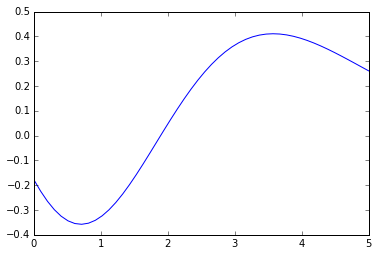

In [60]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn
x = np.linspace(0,5)


@interact(n=(0, 10))
def p(n):
    f, ax = plt.subplots()
    ax.plot(x, jn(x,n))
    plt.show()

Ejemplo más lindo: sistema de ecuaciones diferenciales ordinarias de [Lorenz](http://en.wikipedia.org/wiki/Lorenz_system)

$$
\begin{aligned}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{aligned}
$$

In [3]:
import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames

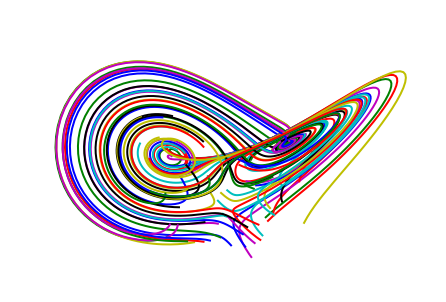

In [6]:
@interact(angle=(0.,360.), az=(0,60), N=(0,50), sigma=(0.0,50.0), rho=(0.0,50.0))
def solve_lorenz(N=10, angle=0.0, az=30, max_time=4.0, sigma=10.0, beta=8./3, rho=28.0):

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('off')

    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))
    
    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])
    
    # choose a different color for each trajectory
    colors = plt.cm.jet(np.linspace(0, 1, N))

    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)

    ax.view_init(az, angle)
    plt.show()

    return t, x_t